### Listing 5.4. Copying images to training, validation, and test directories

In [2]:
import os, shutil

# Path to the directory where the original dataset was uncompressed
original_dataset_dir = '/Users/macuser/Documents/CSULB/Fall2022/AdvancedArtificialIntelligence/Assignment6/dogs-vs-cats/train' 

# Directory where you’ll store your smaller dataset
base_dir = '/Users/macuser/Documents/CSULB/Fall2022/AdvancedArtificialIntelligence/Assignment6/cats_and_dogs_small'         
os.mkdir(base_dir)

# Directories for the training, validation, and test splits
train_dir = os.path.join(base_dir, 'train')                                
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')                   
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')                                  
os.mkdir(test_dir)

# Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')                           
os.mkdir(train_cats_dir)                                                   

# Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')                           
os.mkdir(train_dogs_dir)                                                   

# Directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')                 
os.mkdir(validation_cats_dir)                                              

# Directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')                 
os.mkdir(validation_dogs_dir)                                              

# Directory with test cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')                             
os.mkdir(test_cats_dir)                                                    

# Directory with test dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')                             
os.mkdir(test_dogs_dir)                                                    

# Copies the first 1,000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]                     
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(train_cats_dir, fname)                              
    shutil.copyfile(src, dst)                                              

# Copies the next 500 cat images to validation_cats_dir    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]               
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(validation_cats_dir, fname)                         
    shutil.copyfile(src, dst)                                              

# Copies the next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]               
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(test_cats_dir, fname)                               
    shutil.copyfile(src, dst)                                              

# Copies the first 1,000 dog images to train_dogs_dir    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]                     
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(train_dogs_dir, fname)                              
    shutil.copyfile(src, dst) 

# Copies the next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]               
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(validation_dogs_dir, fname)                         
    shutil.copyfile(src, dst)                                              

# Copies the next 500 dog images to test_dogs_dir    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]               
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(test_dogs_dir, fname)                               
    shutil.copyfile(src, dst)         

In [4]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))


total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


### Listing 5.5. Instantiating a small convnet for dogs vs. cats classification

In [5]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

### Listing 5.6. Configuring the model for training

In [7]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

### Listing 5.7. Using ImageDataGenerator to read images from directories

In [10]:
from keras.preprocessing.image import ImageDataGenerator

# Rescales all images by 1/255
train_datagen = ImageDataGenerator(rescale=1./255)             
test_datagen = ImageDataGenerator(rescale=1./255)              

#  Target directory
train_generator = train_datagen.flow_from_directory(
        train_dir,
    #  Resizes all images to 150 × 150
        target_size = (150, 150),                                 
        batch_size = 20,
    # Because you use binary_crossentropy loss, you need binary labels.
        class_mode='binary')                                   

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
for data_batch, labels_batch in train_generator:
     print('data batch shape:', data_batch.shape)
     print('labels batch shape:', labels_batch.shape)
     break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


### Listing 5.8. Fitting the model using a batch generator

In [12]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 39s 388ms/step - loss: 0.6858 - acc: 0.5300 - val_loss: 0.6679 - val_acc: 0.6130
Epoch 2/30
100/100 [==============================] - 42s 422ms/step - loss: 0.6344 - acc: 0.6375 - val_loss: 0.7191 - val_acc: 0.5970
Epoch 3/30
100/100 [==============================] - 42s 423ms/step - loss: 0.5915 - acc: 0.6900 - val_loss: 0.6692 - val_acc: 0.6370
Epoch 4/30
100/100 [==============================] - 41s 414ms/step - loss: 0.5495 - acc: 0.7115 - val_loss: 0.6360 - val_acc: 0.6180
Epoch 5/30
100/100 [==============================] - 40s 400ms/step - loss: 0.5313 - acc: 0.7285 - val_loss: 0.5734 - val_acc: 0.6730
Epoch 6/30
100/100 [==============================] - 41s 408ms/step - loss: 0.4974 - acc: 0.7675 - val_loss: 0.4591 - val_acc: 0.6890
Epoch 7/30
100/100 [==============================] - 41s 414ms/step - loss: 0.4786 - acc: 0.7725 - val_loss: 0.6071 - val_acc: 0.7090
Epoch 8/30
100/100 [==============================] - 4

### Listing 5.9. Saving the model

In [13]:
model.save('cats_and_dogs_small_1.h5')

### Listing 5.10. Displaying curves of loss and accuracy during training

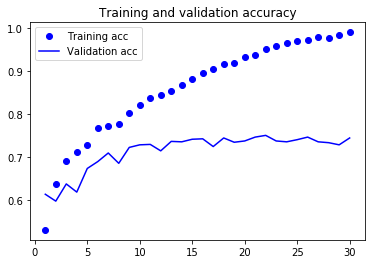

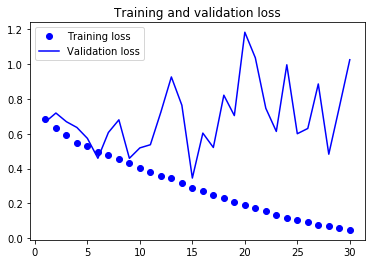

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Listing 5.11. Setting up a data augmentation configuration via ImageDataGenerator

In [16]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

### Listing 5.12. Displaying some randomly augmented training images

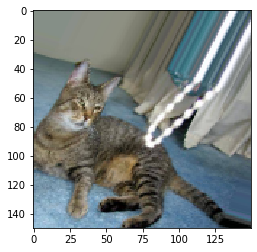

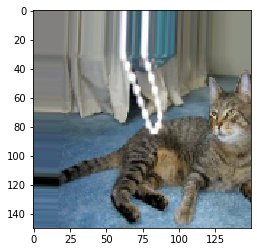

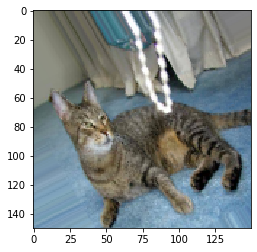

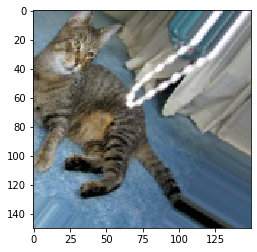

In [17]:
# Module with image-preprocessing utilities
from keras.preprocessing import image                       

fnames = [os.path.join(train_cats_dir, fname) for
     fname in os.listdir(train_cats_dir)]

# Chooses one image to augment
img_path = fnames[3]                                            

# Reads the image and resizes it
img = image.load_img(img_path, target_size=(150, 150))      

#  Converts it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)   

# Reshapes it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)                                   

# Generates batches of randomly transformed images. Loops indefinitely, so you need to break the loop at some point!
i = 0                                                           
for batch in datagen.flow(x, batch_size=1):                     
    plt.figure(i)                                               
    imgplot = plt.imshow(image.array_to_img(batch[0]))          
    i += 1                                                      
    if i % 4 == 0:                                              
        break                                                   

plt.show()

### Listing 5.13. Defining a new convnet that includes dropout

In [18]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

### Listing 5.14. Training the convnet using data-augmentation generators

In [19]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data shouldn’t be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)               

# Target directory
train_generator = train_datagen.flow_from_directory(
        train_dir,      
    # Resizes all images to 150 × 150
        target_size=(150, 150),                                 
        batch_size=32,
    # Because you use binary_crossentropy loss, you need binary labels.
        class_mode='binary')                                

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 78s 781ms/step - loss: 0.6908 - acc: 0.5170 - val_loss: 0.6797 - val_acc: 0.5895
Epoch 2/100
100/100 [==============================] - 72s 719ms/step - loss: 0.6842 - acc: 0.5429 - val_loss: 0.7012 - val_acc: 0.5412
Epoch 3/100
100/100 [==============================] - 66s 663ms/step - loss: 0.6673 - acc: 0.5859 - val_loss: 0.6270 - val_acc: 0.5964
Epoch 4/100
100/100 [==============================] - 66s 662ms/step - loss: 0.6565 - acc: 0.6149 - val_loss: 0.5668 - val_acc: 0.6276
Epoch 5/100
100/100 [==============================] - 82s 819ms/step - loss: 0.6396 - acc: 0.6291 - val_loss: 0.5477 - val_acc: 0.6643
Epoch 6/100
100/100 [==============================] - 103s 1s/step - loss: 0.6133 - acc: 0.6702 - val_loss: 0.5460 - val_acc: 0.6778
Epoch 7/100
100/100 [==============================] - 99s 994ms/step - loss: 0.6036 - acc: 0.6714 - v

100/100 [==============================] - 69s 692ms/step - loss: 0.4032 - acc: 0.8141 - val_loss: 0.5318 - val_acc: 0.7881
Epoch 61/100
100/100 [==============================] - 68s 679ms/step - loss: 0.3857 - acc: 0.8311 - val_loss: 0.5686 - val_acc: 0.7925
Epoch 62/100
100/100 [==============================] - 69s 691ms/step - loss: 0.4116 - acc: 0.8062 - val_loss: 0.5297 - val_acc: 0.7811
Epoch 63/100
100/100 [==============================] - 63s 626ms/step - loss: 0.4063 - acc: 0.8119 - val_loss: 0.3907 - val_acc: 0.8041
Epoch 64/100
100/100 [==============================] - 70s 703ms/step - loss: 0.3997 - acc: 0.8153 - val_loss: 0.8268 - val_acc: 0.8061
Epoch 65/100
100/100 [==============================] - 65s 654ms/step - loss: 0.3870 - acc: 0.8211 - val_loss: 0.3656 - val_acc: 0.7881
Epoch 66/100
100/100 [==============================] - 65s 653ms/step - loss: 0.3823 - acc: 0.8282 - val_loss: 0.3228 - val_acc: 0.8061
Epoch 67/100
100/100 [==============================] 

### Listing 5.15. Saving the model

In [20]:
model.save('cats_and_dogs_small_2.h5')

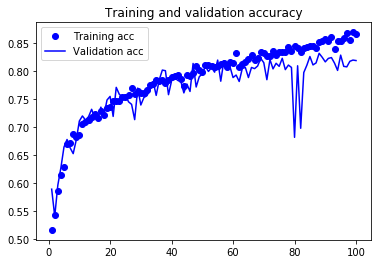

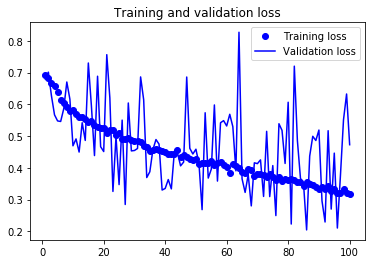

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()